# Tugas Besar 1B IF3270 - Machine Learning
------------------------------------------
##### NIM/Nama  : 13517014/Yoel Susanto | 13517065/Andrian Cedric | 13517131/Jan Meyer Saragih | 13517137/Vincent Budianto
##### Nama file : Tubes1B_13517014.ipynb
##### Topik     : Implementasi modul ID3 dan C4.5
##### Tanggal   : 14 February 2020
------------------------------------------

In [1]:
from DecisionTree import DecisionTree
from FitC45 import *
from sklearn.tree.export import export_text

import Function as f
import id3 as id
import numpy as np
import pandas as pd
import sklearn.datasets as dataset
import sklearn.preprocessing as preprocessing
import sklearn.tree as tree

C:\Python\Python37-32\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Python\Python37-32\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# A. Perbandingan Sklearn, ID3Estimator dan ID3 + C4.5

In [2]:
iris = dataset.load_iris()
tennis = pd.read_csv('tennis.csv')
tHead = list(tennis.columns)
tennis = np.array(tennis)
decision_tree = tree.DecisionTreeClassifier(criterion='entropy')
estimator = id.Id3Estimator()
encoder = preprocessing.LabelEncoder()

## A. Dataset iris

### a. DecisionTreeClassifier

[Text(167.4, 199.32, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\nentropy = 0.918\nsamples = 3\nvalue 

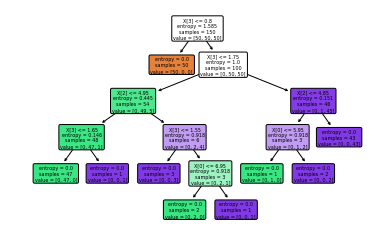

In [4]:
iris_tree1 = decision_tree.fit(iris.data, iris.target)
tree.plot_tree(iris_tree1, filled=True, rounded=True)

In [5]:
ri1 = export_text(iris_tree1, feature_names=iris['feature_names'])
print(ri1)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



### b. Id3Estimator

In [6]:
iris_tree2 = estimator.fit(iris.data, iris.target)

In [7]:
ri2 = id.export_text(iris_tree2.tree_, feature_names=iris['feature_names'])
print(ri2)


petal length (cm) <=2.45: 0 (50) 
petal length (cm) >2.45
|   petal width (cm) <=1.75
|   |   sepal length (cm) <=7.10
|   |   |   sepal width (cm) <=2.85: 1 (27/4) 
|   |   |   sepal width (cm) >2.85: 1 (22) 
|   |   sepal length (cm) >7.10: 2 (1) 
|   petal width (cm) >1.75
|   |   sepal length (cm) <=5.95
|   |   |   sepal width (cm) <=3.10: 2 (6) 
|   |   |   sepal width (cm) >3.10: 1 (1) 
|   |   sepal length (cm) >5.95: 2 (39) 



### C. ID3 + C4.5

In [ ]:
dataHead, data = getCSVData("iris.csv")
data, attributeDictionary, attributeIsDiscrete = translateX(data)
dataX, dataY = splitXY(data)
dataY, classDictionary = translateY(dataY)
fit(dataX, dataY, dataHead, attributeDictionary, attributeIsDiscrete, classDictionary)

## C. Dataset tennis

### a. DecisionTreeClassifier

[Text(133.92000000000002, 195.696, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(100.44000000000001, 152.208, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(100.44000000000001, 108.72, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(66.96000000000001, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(33.480000000000004, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(100.44000000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(133.92000000000002, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(234.36, 108.72, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(200.88000000000002, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(267.84000000000003, 65.232, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(234.36, 21.744, 'entropy = 0

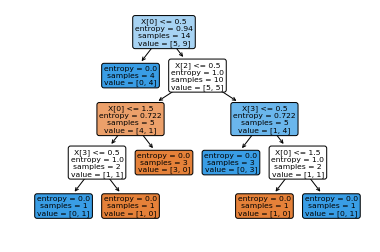

In [8]:
tennis[:, 0] = encoder.fit_transform(tennis[:, 0])
tennis[:, 1] = encoder.fit_transform(tennis[:, 1])
tennis[:, 2] = encoder.fit_transform(tennis[:, 2])
tennis[:, 3] = encoder.fit_transform(tennis[:, 3])
tennis[:, 4] = encoder.fit_transform(tennis[:, 4])

tData = tennis[:, :4]
tTarget = list(tennis[:, 4])

tennis_tree1 = decision_tree.fit(tData, tTarget)
tree.plot_tree(tennis_tree1, filled=True, rounded=True)

In [9]:
rt1 = export_text(tennis_tree1, feature_names=tHead[:4])
print(rt1)

|--- outlook <= 0.50
|   |--- class: 1
|--- outlook >  0.50
|   |--- humidity <= 0.50
|   |   |--- outlook <= 1.50
|   |   |   |--- windy <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- windy >  0.50
|   |   |   |   |--- class: 0
|   |   |--- outlook >  1.50
|   |   |   |--- class: 0
|   |--- humidity >  0.50
|   |   |--- windy <= 0.50
|   |   |   |--- class: 1
|   |   |--- windy >  0.50
|   |   |   |--- outlook <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- outlook >  1.50
|   |   |   |   |--- class: 1



### b. Id3Estimator

In [10]:
tennis_tree2 = estimator.fit(tData, tTarget)

In [11]:
rt2 = id.export_text(tennis_tree2.tree_, feature_names=tHead[:4])
print(rt2)


outlook <=0.50: 1 (4) 
outlook >0.50
|   humidity <=0.50
|   |   temp <=1.50: 0 (2) 
|   |   temp >1.50
|   |   |   windy <=0.50: 0 (1/1) 
|   |   |   windy >0.50: 0 (1) 
|   humidity >0.50
|   |   windy <=0.50: 1 (3) 
|   |   windy >0.50
|   |   |   temp <=1.00: 0 (1) 
|   |   |   temp >1.00: 1 (1) 



### C. ID3 + C4.5

In [ ]:
dataHead, data = getCSVData("tennis.csv")
data, attributeDictionary, attributeIsDiscrete = translateX(data)
dataX, dataY = splitXY(data)
dataY, classDictionary = translateY(dataY)
fit(dataX, dataY, dataHead, attributeDictionary, attributeIsDiscrete, classDictionary)

# B. Penjelasan Implementasi dan Hasil Eksekusi ID3 + C4.5

## Penjelasan Implementasi

### Pseudo-code
<ol>
    <li> Check for the above base cases. </li>
    <li> For each attribute x, find the normalized information gain ratio from splitting on x. </li>
    <li> Let x_best be the attribute with the highest normalized information gain. </li>
    <li> Create a decision node that splits on x_best. </li>
    <li> Recur on the sublists obtained by splitting on x_best, and add those nodes as children of node. </li>
</ol>

### C4.5 Improvements
<ol>
    <li> <i> Handling continuous attributes </i>
        <ul>
            <li> C4.5 creates a threshold and then splits the list into those whose attribute value is above the threshold and those that are less than or equal to it in order to handle continuous attributes. </li>
        </ul>
    </li>
    <li> <i> Handling missing attribute value </i> 
        <ul>
            <li> C4.5 allows missing attribute values to be marked as '?' (Missing attribute values are simply not used in gain and entropy calculations). </li>
        </ul>
    </li>
    <li> <i> Handling attributes with differing costs </i> </li>
    <li> <i> Post-pruning </i>
        <ul>
            <li> Once tree has been created, C4.5 goes back through the tree to remove branches that don't really affect the decision tree accuracy and subtitute it with majority class in that branch. This method will reduce overfitting caused by training data that too detail. </li>
        </ul>
    </li>
</ol>

# C. Pembagian Tugas

| NIM      | Nama              | Tugas |
|:--------:|:------------------|:------|
| 13517014 | Yoel Susanto      |  |
| 13517065 | Andrian Cedric    |  |
| 13517131 | Jan Meyer Saragih |  |
| 13517137 | Vincent Budianto  |  |